<a href="https://colab.research.google.com/github/Archi7799/Aircraft-Loyalty-Program-Analysis/blob/main/Aircraft_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
calendar = pd.read_csv('Calendar.csv')
flight = pd.read_csv('Customer Flight Activity.csv')
loyalty = pd.read_csv('Customer Loyalty History.csv')

# Calendar Cleaning

In [3]:
calendar.head(3)

Date Start of Year Start of Quarter Start of Month
0  2012-01-01    2012-01-01       2012-01-01     2012-01-01
1  2012-01-02    2012-01-01       2012-01-01     2012-01-01
2  2012-01-03    2012-01-01       2012-01-01     2012-01-01

In [4]:
dp = pd.DataFrame(calendar).reset_index()

In [5]:
dp.isnull().sum()

index               0
Date                0
Start of Year       0
Start of Quarter    0
Start of Month      0
dtype: int64

In [6]:
duplicates = dp[dp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [index, Date, Start of Year, Start of Quarter, Start of Month]
Index: []


In [7]:
dp['Start of Year'].value_counts()

2012-01-01    366
2016-01-01    366
2013-01-01    365
2014-01-01    365
2015-01-01    365
2017-01-01    365
2018-01-01    365
Name: Start of Year, dtype: int64

In [8]:
dp['Start of Quarter'].value_counts()

2015-07-01    92
2014-07-01    92
2018-07-01    92
2017-10-01    92
2017-07-01    92
2016-10-01    92
2016-07-01    92
2015-10-01    92
2014-10-01    92
2018-10-01    92
2013-07-01    92
2012-07-01    92
2012-10-01    92
2013-10-01    92
2014-04-01    91
2018-04-01    91
2017-04-01    91
2013-04-01    91
2016-04-01    91
2016-01-01    91
2012-04-01    91
2015-04-01    91
2012-01-01    91
2014-01-01    90
2017-01-01    90
2013-01-01    90
2018-01-01    90
2015-01-01    90
Name: Start of Quarter, dtype: int64

In [9]:
dp['Start of Month'].value_counts()

2012-01-01    31
2014-08-01    31
2014-12-01    31
2015-01-01    31
2015-03-01    31
              ..
2018-02-01    28
2013-02-01    28
2015-02-01    28
2014-02-01    28
2017-02-01    28
Name: Start of Month, Length: 84, dtype: int64

# Flight cleaning

In [10]:
df = pd.DataFrame(flight).reset_index()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        392936 non-null  int64  
 1   Loyalty Number               392936 non-null  int64  
 2   Year                         392936 non-null  int64  
 3   Month                        392936 non-null  int64  
 4   Total Flights                392936 non-null  int64  
 5   Distance                     392936 non-null  int64  
 6   Points Accumulated           392936 non-null  float64
 7   Points Redeemed              392936 non-null  int64  
 8   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 27.0 MB


In [12]:
df.describe()

index  Loyalty Number           Year          Month  \
count  392936.000000   392936.000000  392936.000000  392936.000000   
mean   196467.500000   550527.519034    2017.513661       6.513661   
std    113430.997025   258604.580187       0.499814       3.445428   
min         0.000000   100018.000000    2017.000000       1.000000   
25%     98233.750000   327688.000000    2017.000000       4.000000   
50%    196467.500000   551833.000000    2018.000000       7.000000   
75%    294701.250000   772194.000000    2018.000000      10.000000   
max    392935.000000   999986.000000    2018.000000      12.000000   

       Total Flights       Distance  Points Accumulated  Points Redeemed  \
count  392936.000000  392936.000000       392936.000000    392936.000000   
mean        1.294888    1941.440201         2027.172345        31.304263   
std         1.962675    3239.975889         3872.139841       126.653775   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.000000       0.000000            0.000000         0.000000   
50%         0.000000       0.000000            0.000000         0.000000   
75%         2.000000    3018.000000         3039.000000         0.000000   
max        28.000000   67284.000000       100926.000000       876.000000   

       Dollar Cost Points Redeemed  
count                392936.000000  
mean                      5.635661  
std                      22.801167  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                     158.000000

In [22]:
points_float = df[df['Points Accumulated'].apply(lambda x: isinstance(x, float))]
points_float['Points Accumulated'].count()

181762

People do not redeem points much

In [13]:
df.isnull().sum()

index                          0
Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [14]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [index, Loyalty Number, Year, Month, Total Flights, Distance, Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed]
Index: []


In [16]:
df = df[(df['Total Flights'] != 0) | (df['Distance'] != 0) | (df['Points Accumulated'] != 0) | (df['Points Redeemed'] != 0.0) | (df['Dollar Cost Points Redeemed'] != 0.0)]

In [17]:
df.head(10)

index  Loyalty Number  Year  Month  Total Flights  Distance  \
0       0          100590  2018      6             12     15276   
1       1          100590  2018      7             12      9168   
2       2          100590  2018      5              4      6504   
3       3          100590  2018     10              0         0   
11     11          102376  2018      6             24     21216   
12     12          102376  2018     12             15     16500   
13     13          102376  2018      7             12     25080   
14     14          102376  2018      8             12      6360   
15     15          102376  2018      9              6      7452   
16     16          102376  2018      5              4      2972   

    Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
0              22914.0                0                            0  
1              13752.0                0                            0  
2               9756.0                0                            0  
3                  0.0              512                           92  
11             31824.0                0                            0  
12             24750.0              556                          100  
13             37620.0                0                            0  
14              9540.0                0                            0  
15             11178.0                0                            0  
16              4458.0                0                            0

In [18]:
df['Year'].unique()

array([2018, 2017])

# Loyalty cleaning

In [23]:
dt = pd.DataFrame(loyalty).reset_index()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16737 non-null  int64  
 1   Loyalty Number      16737 non-null  int64  
 2   Country             16737 non-null  object 
 3   Province            16737 non-null  object 
 4   City                16737 non-null  object 
 5   Postal Code         16737 non-null  object 
 6   Gender              16737 non-null  object 
 7   Education           16737 non-null  object 
 8   Salary              12499 non-null  float64
 9   Marital Status      16737 non-null  object 
 10  Loyalty Card        16737 non-null  object 
 11  CLV                 16737 non-null  float64
 12  Enrollment Type     16737 non-null  object 
 13  Enrollment Year     16737 non-null  int64  
 14  Enrollment Month    16737 non-null  int64  
 15  Cancellation Year   2067 non-null   float64
 16  Canc

In [24]:
dt.describe()

index  Loyalty Number         Salary           CLV  \
count  16737.000000    16737.000000   12499.000000  16737.000000   
mean    8368.000000   549735.880445   79245.609409   7988.896536   
std     4831.700063   258912.132453   35008.297285   6860.982280   
min        0.000000   100018.000000  -58486.000000   1898.010000   
25%     4184.000000   326603.000000   59246.500000   3980.840000   
50%     8368.000000   550434.000000   73455.000000   5780.180000   
75%    12552.000000   772019.000000   88517.500000   8940.580000   
max    16736.000000   999986.000000  407228.000000  83325.380000   

       Enrollment Year  Enrollment Month  Cancellation Year  \
count     16737.000000      16737.000000        2067.000000   
mean       2015.253211          6.669116        2016.503145   
std           1.979111          3.398958           1.380743   
min        2012.000000          1.000000        2013.000000   
25%        2014.000000          4.000000        2016.000000   
50%        2015.000000          7.000000        2017.000000   
75%        2017.000000         10.000000        2018.000000   
max        2018.000000         12.000000        2018.000000   

       Cancellation Month  
count         2067.000000  
mean             6.962748  
std              3.455297  
min              1.000000  
25%              4.000000  
50%              7.000000  
75%             10.000000  
max             12.000000

In [25]:
dt.isnull().sum()

index                     0
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [26]:
dt['Salary'] = dt['Salary'].abs()

In [27]:
dt['Salary'].describe()

count     12499.000000
mean      79359.340907
std       34749.691464
min        9081.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

In [28]:
dt['Salary'] = dt['Salary'].fillna(dt['Salary'].mean())

In [29]:
duplicates = dt[dt.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [index, Loyalty Number, Country, Province, City, Postal Code, Gender, Education, Salary, Marital Status, Loyalty Card, CLV, Enrollment Type, Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month]
Index: []


In [30]:
dt[dt.isnull().any(axis=1)]

index  Loyalty Number Country          Province        City  \
0          0          480934  Canada           Ontario     Toronto   
1          1          549612  Canada           Alberta    Edmonton   
3          3          608370  Canada           Ontario     Toronto   
4          4          530508  Canada            Quebec        Hull   
5          5          193662  Canada             Yukon  Whitehorse   
...      ...             ...     ...               ...         ...   
16731  16731          900501  Canada           Ontario     Sudbury   
16732  16732          823768  Canada  British Columbia   Vancouver   
16733  16733          680886  Canada      Saskatchewan      Regina   
16734  16734          776187  Canada  British Columbia   Vancouver   
16735  16735          906428  Canada             Yukon  Whitehorse   

      Postal Code  Gender Education         Salary Marital Status  \
0         M2Z 4K1  Female  Bachelor   83236.000000        Married   
1         T3G 6Y6    Male   College   79359.340907       Divorced   
3         P1W 1K4    Male   College   79359.340907         Single   
4         J8Y 3Z5    Male  Bachelor  103495.000000        Married   
5         Y2K 6R0    Male  Bachelor   51124.000000        Married   
...           ...     ...       ...            ...            ...   
16731     M5V 1G5    Male   College   79359.340907         Single   
16732     V6E 3Z3  Female   College   79359.340907        Married   
16733     S1J 3C5  Female  Bachelor   89210.000000        Married   
16734     V5R 1W3    Male   College   79359.340907         Single   
16735     Y2K 6R0    Male  Bachelor   57297.000000        Married   

      Loyalty Card       CLV Enrollment Type  Enrollment Year  \
0             Star   3839.14        Standard             2016   
1             Star   3839.61        Standard             2016   
3             Star   3839.75        Standard             2013   
4             Star   3842.79        Standard             2014   
5             Star   3844.57        Standard             2012   
...            ...       ...             ...              ...   
16731         Star  61134.68        Standard             2012   
16732         Star  61850.19        Standard             2012   
16733         Star  67907.27        Standard             2014   
16734         Star  74228.52        Standard             2014   
16735         Star  10018.66  2018 Promotion             2018   

       Enrollment Month  Cancellation Year  Cancellation Month  
0                     2                NaN                 NaN  
1                     3                NaN                 NaN  
3                     2                NaN                 NaN  
4                    10                NaN                 NaN  
5                     5                NaN                 NaN  
...                 ...                ...                 ...  
16731                 9                NaN                 NaN  
16732                12                NaN                 NaN  
16733                 9                NaN                 NaN  
16734                 3                NaN                 NaN  
16735                 4                NaN                 NaN  

[14670 rows x 17 columns]

In [31]:
dt['Enrollment Year'].unique()

array([2016, 2014, 2013, 2012, 2015, 2018, 2017])

# Analysis

In [32]:
clients = df.drop(['Year', 'Month'], axis=1)
clients = clients.groupby('Loyalty Number', as_index=False).sum()

In [33]:
final = pd.merge(loyalty, clients, on='Loyalty Number', how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15176 entries, 0 to 15175
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               15176 non-null  int64  
 1   Country                      15176 non-null  object 
 2   Province                     15176 non-null  object 
 3   City                         15176 non-null  object 
 4   Postal Code                  15176 non-null  object 
 5   Gender                       15176 non-null  object 
 6   Education                    15176 non-null  object 
 7   Salary                       11302 non-null  float64
 8   Marital Status               15176 non-null  object 
 9   Loyalty Card                 15176 non-null  object 
 10  CLV                          15176 non-null  float64
 11  Enrollment Type              15176 non-null  object 
 12  Enrollment Year              15176 non-null  int64  
 13  Enrollment Month

In [34]:
final.isnull().sum()

Loyalty Number                     0
Country                            0
Province                           0
City                               0
Postal Code                        0
Gender                             0
Education                          0
Salary                          3874
Marital Status                     0
Loyalty Card                       0
CLV                                0
Enrollment Type                    0
Enrollment Year                    0
Enrollment Month                   0
Cancellation Year              14058
Cancellation Month             14058
index                              0
Total Flights                      0
Distance                           0
Points Accumulated                 0
Points Redeemed                    0
Dollar Cost Points Redeemed        0
dtype: int64

Assuming client program is not finished or simply data not provided for Cancellation Year and Month.

Dropping the Country column as it only has value = "Canada" for all records. The Dollar Cost points redeemed can be ignored as well, since we can work with the total points redeemed instead. The Province column can be dropped as well, as we can work with the more varied 'City' column for better clustering. The Postal Code can be dropped as for now it will go too narrow.

In [35]:
final = final.drop(['Country','Province','Postal Code','Dollar Cost Points Redeemed'], axis=1)

In [36]:
corr_matrix = final.corr()

<ipython-input-36-75b1d2befd9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final.corr()


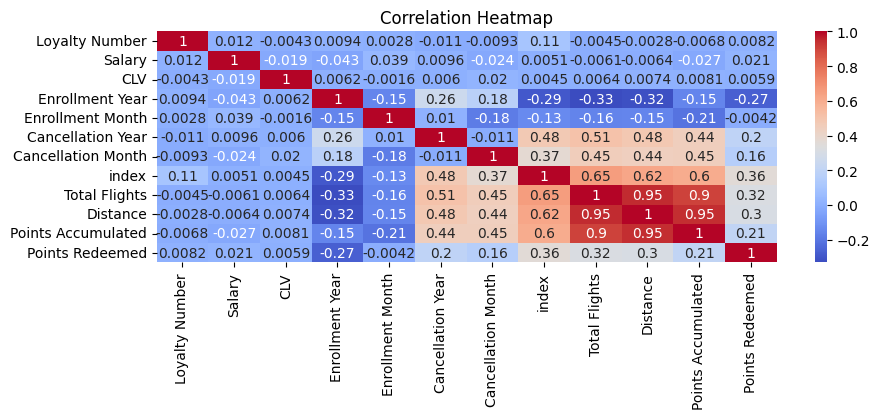

In [37]:
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## City Analysis

In [38]:
flights_per_city = final.groupby('City')['Total Flights'].sum().reset_index()
flights_per_city = flights_per_city.sort_values(by = 'Total Flights', ascending=False)

fig2 = px.line(flights_per_city, x = 'City', y = 'Total Flights', markers=True, title = 'Total Flights per City')
fig2.show()

In [39]:
flights = final[final['City'].isin(['Toronto', 'Vancouver', 'Montreal','Winnipeg'])]
sum_TVM = flights['Total Flights'].sum()
sum_total = final['Total Flights'].sum()
percent=(sum_TVM/sum_total)*100

print(f"Out of all the total flights in Canada, {percent:.2f}% of them are from Toronto, Vancouver, Montreal and Winnipeg")

Out of all the total flights in Canada, 51.60% of them are from Toronto, Vancouver, Montreal and Winnipeg


Top cities of Canada involving Toronta, Vancouver, Montreal, and Winnipeg together booked 51.55% which is half percentage of all flights.

In [40]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [41]:
fig = sp.make_subplots(specs=[[{"type": "bar"}]])

d = pd.pivot_table(data=flights, values='Total Flights', columns=['Loyalty Card'], index=['City'], aggfunc='count')
for column in d.columns:
    fig.add_trace(go.Bar(x=d.index, y=d[column], name=column))

fig.update_layout(title='For each loyalty card, total flighs per top cities',width=500, height=300, yaxis_title='Count of total flights',xaxis_title='City')
fig.show()


Top cities shows clients are in Star Loyalty Card then Nova then Aurora.

## Marital Status Analysis

In [42]:
t = final[final['Enrollment Year'].isin([2017, 2018])]

In [43]:
fig3 = px.histogram(final, x='Marital Status', nbins=len(t['Marital Status'].unique()), title='Enrollment by Marital Status')
fig3.update_layout(width=400, height=300)
fig3.show()

In [44]:
fig4 = px.histogram(t, x='Marital Status', nbins=len(t['Marital Status'].unique()), title='Enrollment by Marital Status in 2017 and 2018')
fig4.update_layout(width=500, height=300)
fig4.show()

Married clients counts to 2508 alone in 2017-2018 , bagging first position to use the program more than others over past years.

In [45]:
loyalty_card_counts = t[t['Marital Status'] == 'Married']['Loyalty Card'].value_counts()
fig = px.bar(loyalty_card_counts, title='Loyalty Card Usage by Married People')
fig.update_layout(width=500, height=300)
fig.show()

Married clients uses Star card most.

## Education Analysis

In [46]:
fig5 = px.histogram(final, x='Education', nbins=len(t['Education'].unique()), title='Enrollment by Education ')
fig5.update_layout(width=500, height=400)
fig5.show()

In [47]:
fig6 = px.histogram(t, x='Education', nbins=len(t['Education'].unique()), title='Enrollment by Education in 2017 and 2018')
fig6.update_layout(width=500, height=400)
fig6.show()

Client with 'Bachelor' degree uses the program more than others with 8967 over 2012-2018 and 2716 in 2017-2018 itself, then College degree clients.

In [48]:
loyalty_card_counts = t[t['Education'] == 'Bachelor']['Loyalty Card'].value_counts()
fig = px.bar(loyalty_card_counts, title='Loyalty Card Usage by Bachelor Degree Holders')
fig.update_layout(width=400, height=300)
fig.show()


Maximum client with bachelor degree uses Star card.

## CLV Analysis

In [49]:
fig7 = px.histogram(final, x='Loyalty Card', y='CLV', color='Loyalty Card', title='CLV vs Loyalty Card')
fig7.update_layout(width=500, height=300)
fig7.show()

Client has higher value if they are from the Star Loyalty Card, then it is Nova and then it's Aurora.

In [50]:
fig7 = px.scatter(final, x='Total Flights', y='CLV', color='Total Flights', title='CLV vs Total Flights')
fig7.update_layout(width=600, height=400)
fig7.show()

In general, ignoring 3 outliers, CLV decreases as total flights increases.

## Loyalty Card Analysis

In [51]:
fig8 = px.histogram(final, x='Loyalty Card', color='Enrollment Type', title='Loyalty Card vs Enrollment Type')
fig8.update_layout(width=500, height=300)
fig8.show()

In [52]:
fig9 = px.histogram(final, x='Total Flights', color='Loyalty Card', title='Loyalty Card vs Total Flights')
fig9.update_layout(width=500, height=300)
fig9.show()

Star members take flights then Nova then Aurora.

## Salary Analysis

In [77]:
fig10 = px.scatter(final, x='Salary', color='Enrollment Type', title="Salary Distribution by Enrollment Type")
fig10.update_layout(yaxis_title='Enrollment Type',width=500, height=300)
fig10.show()

In [85]:
fig10 = px.pie(final, values='Salary', names='Loyalty Card', title="Salary Distribution by Loyalty Card")
fig10.update_layout(xaxis_title='Salary',yaxis_title='Loyalty Card', width=500, height=400)
fig10.show()

In [86]:
fig10 = px.scatter(final, x="Salary", color="Loyalty Card", title="Salary Distribution by Loyalty Card")
fig10.update_layout(xaxis_title='Salary',yaxis_title='Loyalty Card', width=500, height=400)
fig10.show()

Maximum people with salary have Star Card and their salary lies in 9k to 15k which occupies 44.5% of total people enrolled.

## Enrollment Analysis

In [61]:
grouped_data = final.groupby(['Enrollment Year', 'Enrollment Month'])['Loyalty Number'].count().reset_index(name='Enrollments')

top_3_months = grouped_data.groupby('Enrollment Year').apply(lambda x: x.nlargest(3, 'Enrollments'))
fig = px.bar(top_3_months, x='Enrollment Month', y='Enrollments', color='Enrollment Year', title='Top 3 Enrollment Months by Year')
fig.show()


July shows highest enrollments then May then September.

## Gender Analysis

In [62]:
gender_allyears = pd.pivot_table(data=final, values='Total Flights', columns=['Gender'], index=['Loyalty Card'], aggfunc='count')

fig = px.bar(gender_allyears, title='Loyalty Card vs Gender ', barmode='group')
fig.update_layout(width=500, height=300)
fig.show()


Clients with higher count are males for Star and Aurora for all years.
Clients with higher count are females for Nova for all years.


In [63]:
gender_2017_2018 = pd.pivot_table(data=t, values='Total Flights', columns=['Gender'], index=['Loyalty Card'], aggfunc='count')

fig = px.bar(gender_2017_2018, title='Loyalty Card vs Gender ', barmode='group')
fig.update_layout(width=500, height=300)
fig.show()

For Aurora and Nova , Clients with higher count are females.
For Star, it's males.

## Total Flights and Distance Analysis

In [64]:
fig = px.scatter(final, x='Distance', y='Total Flights', color='Distance', title='Change in Total Flights on Distance ')
fig.update_layout(width=600, height=500)
fig.show()

In 2017-2018, number of flights increases as per increased in distance.

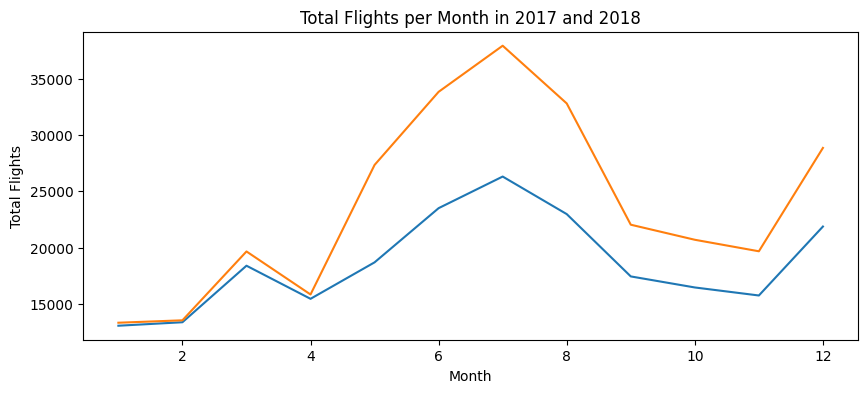

In [65]:
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]

df_2017_monthly = df_2017.groupby('Month')['Total Flights'].sum()
df_2018_monthly = df_2018.groupby('Month')['Total Flights'].sum()

plt.figure(figsize=(10, 4))
plt.plot(df_2017_monthly.index, df_2017_monthly.values, label='2017')
plt.plot(df_2018_monthly.index, df_2018_monthly.values, label='2018')

plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.title('Total Flights per Month in 2017 and 2018')
plt.show()

There is a peek months June, July and August which shows maximum enrollments. And again rise in December. Conclude that it may be due to Summer and Winter Holidays can also be visible in these months.

## Points Analysis

In [66]:
fig4 = px.scatter(final, y = 'Points Accumulated', x = 'Points Redeemed',size = 'Total Flights' ,title = 'Points Accumulated vs Points Redeemed')
fig.update_layout(width=500, height=300)
fig4.show()

As total flights increases, points accumulated increases. Journey about points redeemed is harder to say.

# Conclusion


1. Top cities of Canada involving **Vancouver,Toronta, Montreal, and Winnipeg**together booked 51.55% which is half percentage of all flights. Top cities shows clients are in Star Loyalty Card then Nova then Aurora.

2. **Married clients** counts to 2508 alone in 2017-2018 but also overall, bagging first position to use the program more than others over past years. They uses **Star** Card most.

3. Client with '**Bachelor**' degree uses the program more than others with 8967 over 2012-2018 and 2716 in 2017-2018 itself, then College degree clients. They are in **Star** Card category mostly.

4. Client has higher value if they are from the **Star** Loyalty Card, then it is Nova and then it's Aurora. In general, ignoring 3 outliers, **CLV decreases as total flights increases**.

5. Flights are taken in this order **Star > Nova > Aurora**. **Standard** type enrollment is popular among clients.

6. Maximum people with salary have **Star** Card and their salary lies in **9k to 15k **which occupies **44.5% **of total people enrolled.

7. **July** shows highest enrollments then **May then September**.

8. Clients with higher count are **males** for Star and Aurora for all years. Clients with higher count are females for Nova for all years. For Aurora and Nova , Clients in 2017-2018 with higher count are **females**. For Star, it's males.

9. In 2017-2018, **number of flights increases as per increased in distance**. There is a peek months **June, July and August** which shows maximum enrollments. And again rise in December. Conclude that it may be due to Summer and Winter Holidays can also be visible in these months.

10. As **total flights increases, points accumulated increases**. Journey about points redeemed is harder to say.